In [8]:
import os
from glob import glob
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import music21
warnings.filterwarnings("ignore")

import pretty_midi as pm
from ezchord import Chord

from melody import Melody
from utils import get_chord_progressions
from objective_metrics import calculate_HC

In [9]:
%matplotlib inline

In [10]:
src_folder = '..'

version = '1.2'
folder = f"../data/Complete Examples Melodies Auto/v{version}/Real Book"

chord_progressions = get_chord_progressions(src_folder)

files = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [11]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-17-03-2022-14-10-59.csv', 
    index_col=0).set_index('filename')

In [12]:
res.tail()

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,
Satin Doll.mid,32,100,3,2,99,2,2,0,Real Book,2,C major,C,0,"[1.0, 0.6666, 1.0, 1.0, 0.6666, 0.0, 1.0, 1.0,...",0.734274
Secret Love.mid,24,148,6,2,147,2,2,0,Real Book,2,E- major,Eb,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.6666, 1.0, 1.0, 1....",0.811570
September Song.mid,32,99,3,1,99,3,2,1,Real Book,2,C major,Bb,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333, 1.0, 1....",0.894304
Shiny Stockings.mid,32,100,3,1,99,3,2,1,Real Book,2,A- major,F,9,"[0.6666, 1.0, 0.6666, 0.6666, 0.6666, 1.0, 0.6...",0.736638
Since I Fell For You.mid,32,100,3,2,99,2,2,0,Real Book,2,B- major,Eb,5,"[1.0, 0.6666, 1.0, 0.0, 1.0, 1.0, 0.6666, 1.0,...",0.766158


In [13]:
res[res['min_measure'] > 2]

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,
Beauty And The Beast.mid,28,123,4,5,122,6,6,0,Real Book,5,C major,F,5,"[1.0, 0.6666, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1....",0.704851


In [14]:
res.sort_values('outro_auto', ascending=False).head(10)

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,
A Night In Tunisia.mid,64,110,1,1,110,46,45,1,Real Book,2,F major,Dm,0,"[1.0, 1.0, 0.6666, 0.6666, 1.0, 0.6666, 0.0, 1...",0.795041
Black Orpheus.mid,63,105,1,1,106,43,42,1,Real Book,2,C major,Am,0,"[1.0, 0.6666, 1.0, 1.0, 0.6666, 1.0, 1.0, 1.0,...",0.825044
I Don't Know Why.mid,56,92,1,2,91,34,34,0,Real Book,2,B- major,Bb,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.762509
A Felicidade.mid,48,178,3,1,177,33,32,1,Real Book,2,E- major,Am,9,"[1.0, 1.0, 0.6666, 1.0, 1.0, 1.0, 1.0, 1.0, 1....",0.817442
Dancing On The Ceiling.mid,34,100,2,2,99,30,30,0,Real Book,2,F major,F,0,"[1.0, 1.0, 0.3333, 1.0, 0.6666, 1.0, 1.0, 1.0,...",0.827439
Speak Low.mid,72,171,2,1,171,27,26,1,Real Book,2,F major,F,0,"[0.6666, 1.0, 0.6666, 1.0, 0.6666, 1.0, 0.6666...",0.840885
Accentuate The Positive.mid,32,122,3,1,121,25,24,1,Real Book,2,C major,F,5,"[1.0, 1.0, 0.0, 1.0, 0.3333, 1.0, 1.0, 0.6666,...",0.783531
I'll Be Seeing You.mid,32,120,3,2,121,24,24,0,Real Book,2,E- major,Eb,0,"[1.0, 0.6666, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666,...",0.770423
Falling Grace.mid,48,74,1,2,73,24,24,0,Real Book,2,A- major,Ab,0,"[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.6666, 0.6666,...",0.812480


In [15]:
res[res['outro_auto'] > 8]['outro_auto'].iloc[0:]

filename
A Felicidade.mid               32
A Night In Tunisia.mid         45
Accentuate The Positive.mid    24
Falling Grace.mid              24
Make Someone Happy.mid         12
New York, New York.mid         16
I Don't Know Why.mid           34
I'll Be Seeing You.mid         24
Solar.mid                      10
Speak Low.mid                  26
Anything Goes.mid               9
Black Orpheus.mid              42
Blue Train.mid                 12
Dancing On The Ceiling.mid     30
Isn't It Romantic.mid          17
Lady Is A Tramp.mid            12
Lazy Bird.mid                  16
Name: outro_auto, dtype: int64

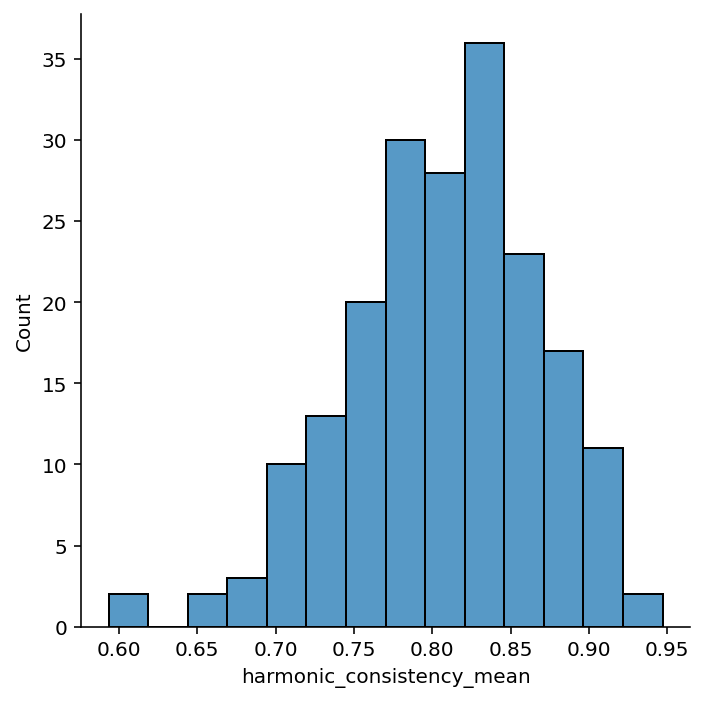

In [16]:
sns.displot(res['harmonic_consistency_mean'])

In [17]:
res[res['harmonic_consistency_mean'] <= 0.7].sort_values('harmonic_consistency_mean')['harmonic_consistency_mean']

filename
Epistrophy.mid                           0.593417
They Can't Take That Away From Me.mid    0.606538
Deep Purple.mid                          0.655282
Blue Monk.mid                            0.660804
In A Mellow Tone.mid                     0.669543
House Of Jade.mid                        0.673812
Prelude To A Kiss.mid                    0.687359
Straight, No Chaser.mid                  0.697900
Name: harmonic_consistency_mean, dtype: float64